## Garment Worker Productivity Prediction Project | HubbleMind

### Project Overview

This project aims to build a machine learning model that predicts productivity levels of garment
workers based on various operational factors within a manufacturing setting. By analyzing features
like work-in-progress, overtime, incentives, and team dynamics, interns will develop models to
predict continuous productivity values, helping businesses improve their workflow efficiency and resource management.

Dataset : <a href="https://drive.google.com/file/d/1Y06CTFXy0_R67YlrRrAT-M4ddPAdlgON/view">Download</a> | Data Source : CC BY 4.0 | UCI Archive

### Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Understanding and Preprocessing


The dataset used for this project is the Garment Worker Productivity Dataset. It includes 1,197
records and 14 features, covering different attributes related to the garment production process,
such as targeted productivity, overtime, and the actual productivity achieved by each team. Each
row represents a record for a team on a particular day, and the target variable (actual productivity)
indicates the team's performance.
<br>
<br>
**Key Features:**
* **date:** Date of the record.
* **quarter:** The quarter of the year (e.g., Q1, Q2).
* **department:** Department of workers (e.g., sewing, finishing).
* **team:** The number representing the team.
* **targeted_productivity:** The target productivity (between 0 and 1).
* **smv:** Standard Minute Value (time required to complete the task).
* **wip:** Work In Progress (missing values present).
* **over_time:** Overtime in minutes.
* **incentive:** Bonus paid to workers.
* **idle_time:** Time during which no work was done.
* **idle_men:** Number of idle workers.
* **no_of_style_change:** Number of style changes in production.
* **no_of_workers:** Number of workers in the team.
* **actual_productivity:** Target variable representing the productivity achieved (between 0 and
1)

1. **Dataset Exploration:**
  - Import the dataset, explore its structure, and differentiate between categorical and
numerical columns.
  - Understand the distribution and data types of key columns.
2. **Data Cleaning:**
  - Handle missing values, such as imputing the wip column using the median.
  - Detect and manage outliers in columns like idle_time, incentive, and
actual_productivity.
3. **Feature Engineering:**
  - Perform one-hot encoding for categorical features (e.g., quarter, department).
  - Extract useful date features such as month and day_of_week.
4. **Feature Scaling:**
  - Scale numerical features (e.g., smv, over_time) using StandardScaler for consistency
in model training.  

#### Loading the data

In [ ]:
# Loads the dataset from Google Drive link
url='https://drive.google.com/file/d/1Y06CTFXy0_R67YlrRrAT-M4ddPAdlgON/view'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

#### Dataset Exploration

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


##### 1. Unique Values

In [ ]:
df.nunique()

,0
date,59
quarter,5
department,3
day,6
team,12
targeted_productivity,9
smv,70
wip,548
over_time,143
incentive,48


##### 2. Data types

In [ ]:
df.dtypes

,0
date,object
quarter,object
department,object
day,object
team,int64
targeted_productivity,float64
smv,float64
wip,float64
over_time,int64
incentive,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

##### 3. Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


##### 4. Null values

In [ ]:
df.isna().any()

,0
date,False
quarter,False
department,False
day,False
team,False
targeted_productivity,False
smv,False
wip,True
over_time,False
incentive,False


In [ ]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


##### 5. Categorical Values

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['date', 'quarter', 'department', 'day']

In [ ]:
# Convert Date Column to DateTime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

#### Data Cleaning

##### Handling missing values (imputing)

In [ ]:
# Impute missing values in the 'wip' column using the median
df['wip'].fillna(df['wip'].median(), inplace=True)

<ipython-input-164-cdb6fe4b92a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].median(), inplace=True)


In [ ]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


##### Detecting outliers

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
for col in ['idle_time', 'incentive', 'actual_productivity']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}:\n", outliers)

Outliers in idle_time:
            date   quarter department        day  team  targeted_productivity  \
615  2015-02-04  Quarter1     sweing  Wednesday     5                   0.65   
617  2015-02-04  Quarter1     sweing  Wednesday     4                   0.35   
650  2015-02-07  Quarter1     sweing   Saturday     7                   0.70   
654  2015-02-07  Quarter1     sweing   Saturday     8                   0.70   
775  2015-02-15  Quarter3     sweing     Sunday     8                   0.70   
798  2015-02-16  Quarter3     sweing     Monday     8                   0.70   
818  2015-02-17  Quarter3     sweing    Tuesday     8                   0.60   
822  2015-02-17  Quarter3     sweing    Tuesday    10                   0.65   
841  2015-02-18  Quarter3     sweing  Wednesday    10                   0.70   
843  2015-02-18  Quarter3     sweing  Wednesday     8                   0.65   
848  2015-02-19  Quarter3     sweing   Thursday     5                   0.80   
860  2015-02-19 

##### Managing outliers

In [ ]:
def cap_values(df, column, lower=None, upper=None):
    """
    Caps values in a column to the specified lower and upper bounds.

    Parameters:
    - df: DataFrame.
    - column: Column name to cap.
    - lower: Lower bound (optional).
    - upper: Upper bound (optional).
    """
    if lower is not None:
        df[column] = df[column].apply(lambda x: max(x, lower))
    if upper is not None:
        df[column] = df[column].apply(lambda x: min(x, upper))


In [ ]:
# Cap targeted and actual productivity
cap_values(df, 'targeted_productivity', lower=0, upper=1)
cap_values(df, 'actual_productivity', lower=0, upper=1)

# IQR-based capping
for col in ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cap_values(df, col, lower=lower_bound, upper=upper_bound)


In [ ]:
# Output after capping
for col in ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}:\n", outliers)

Outliers in smv:
 Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []
Outliers in wip:
 Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []
Outliers in over_time:
 Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []
Outliers in incentive:
 Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []
Outliers in idle_time:
 Empty DataFrame
Columns: [date, quarter, department, day, team, targ

#### Feature Engineering

##### Encoding

In [ ]:
# Log the unique departments in the column
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
# Encode categorical columns without creating new columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int64  
 2   department             1197 non-null   int64  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   float64
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

#### Feature Scaling

In [ ]:
# List of columns to scale
scale_cols = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_workers', 'no_of_style_change', 'actual_productivity']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.80,1.014552,0.549326,0.763049,2.259493,0.0,0.0,0.0,1.099229,1.190164
1,0,0,1,3,1,0.75,-1.016778,0.053658,-1.088995,-0.846671,0.0,0.0,0.0,-1.199268,0.877279
2,0,0,2,3,11,0.80,-0.333878,-0.456377,-0.271917,0.738107,0.0,0.0,0.0,-0.185225,0.381459
3,0,0,2,3,12,0.80,-0.333878,-0.456377,-0.271917,0.738107,0.0,0.0,0.0,-0.185225,0.381459
4,0,0,2,3,6,0.80,0.990783,0.994709,-0.798479,0.738107,0.0,0.0,0.0,0.964023,0.380371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,58,1,0,5,10,0.75,-1.111853,0.053658,-1.088995,-0.846671,0.0,0.0,0.0,-1.199268,-0.612362
1193,58,1,0,5,8,0.70,-1.020434,0.053658,-1.088995,-0.846671,0.0,0.0,0.0,-1.199268,-0.627989
1194,58,1,0,5,7,0.65,-1.020434,0.053658,-1.088995,-0.846671,0.0,0.0,0.0,-1.199268,-0.627989
1195,58,1,0,5,9,0.75,-1.111853,0.053658,-0.834793,-0.846671,0.0,0.0,0.0,-0.883788,-1.318876


### Exploratory Data Analysis (EDA)
1. **Target Variable Analysis:**
  - Analyze the distribution of actual_productivity to understand its spread.


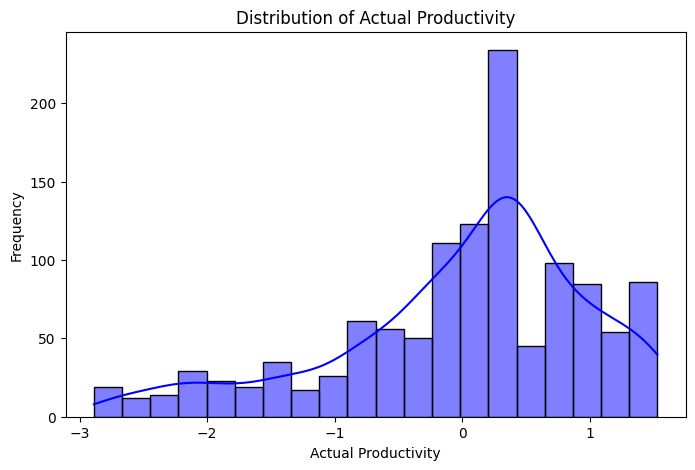

In [ ]:
# Histogram for actual_productivity
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

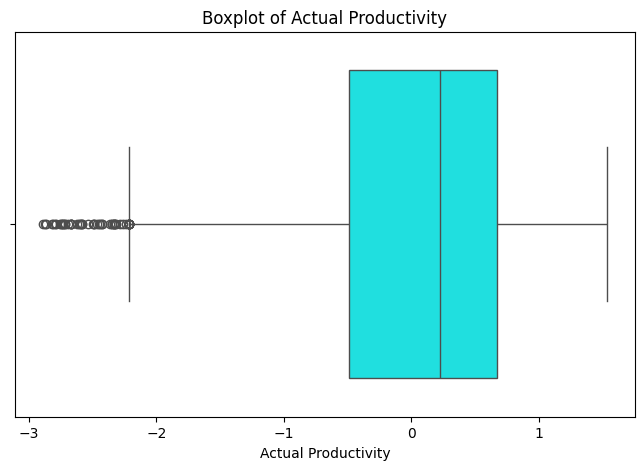

In [ ]:
# Boxplot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['actual_productivity'], color='cyan')
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.show()

2. **Feature Relationships:**
  - Use scatter plots and box plots to visualize the relationships between actual_productivity and features like over_time, incentive, and smv.


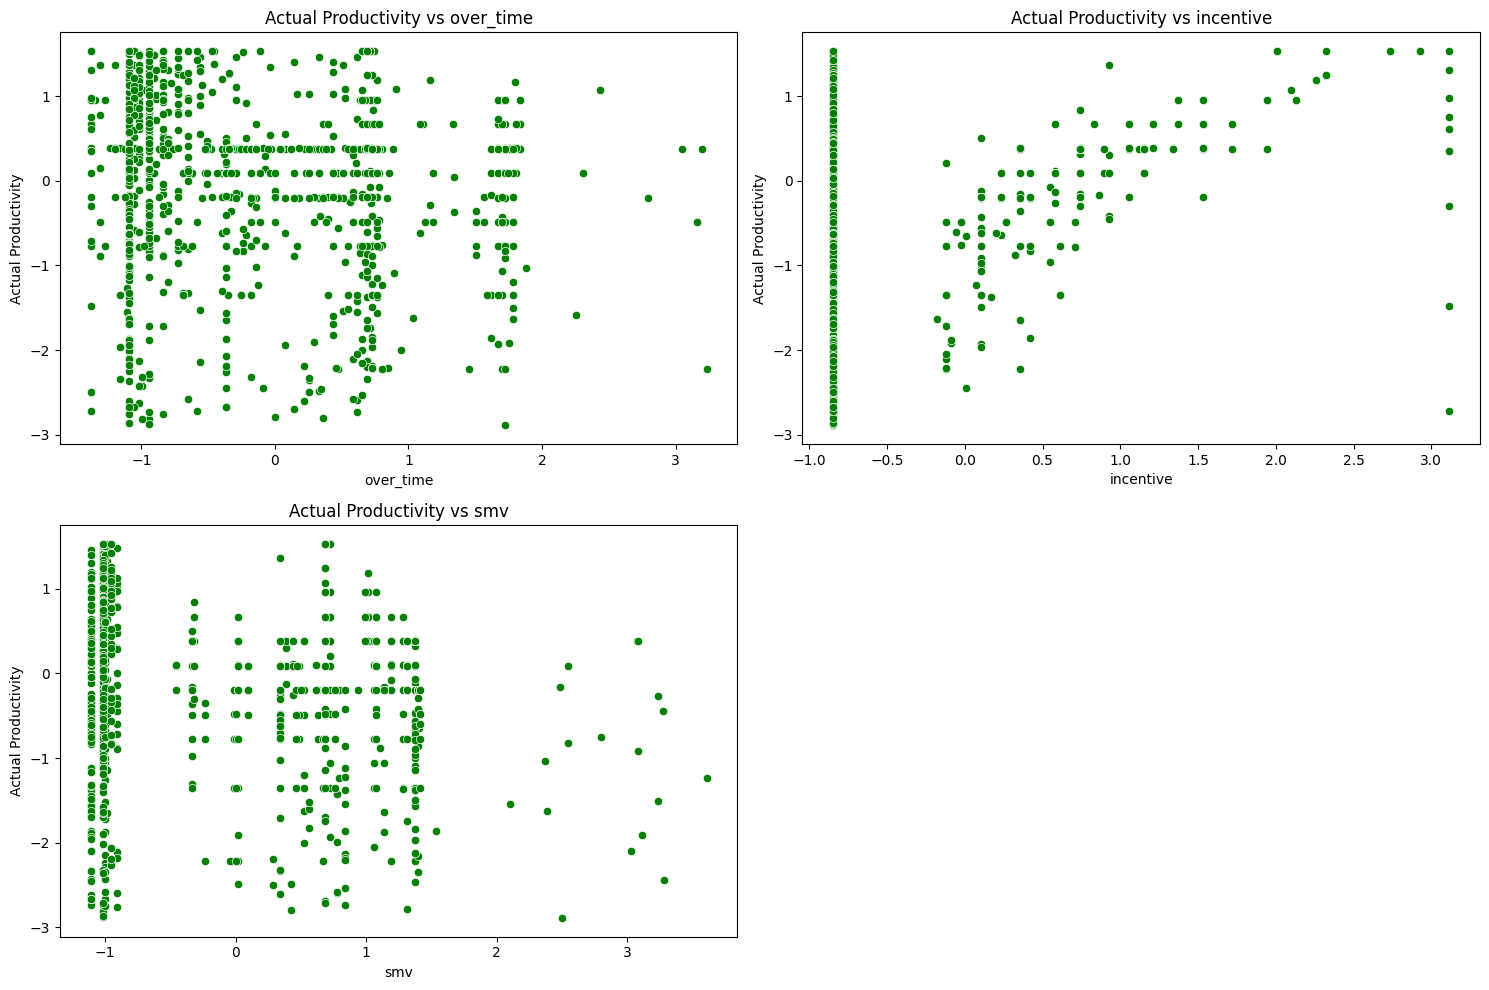

In [ ]:
# Scatter plots for numerical relationships
plt.figure(figsize=(15, 10))

features = ['over_time', 'incentive', 'smv']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='actual_productivity', color='green')
    plt.title(f'Actual Productivity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()

<ipython-input-179-ce086fb45b95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='department', y='actual_productivity', palette='viridis')


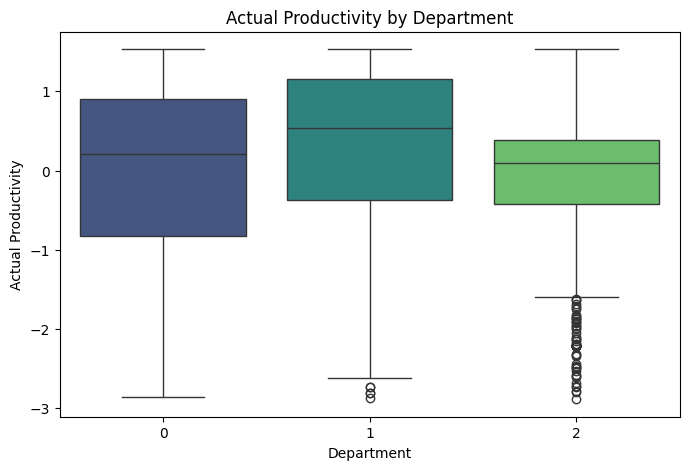

In [ ]:
# Boxplot for categorical variables (if any)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='department', y='actual_productivity', palette='viridis')
plt.title('Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

3. **Correlation Analysis:**
  - Generate a correlation heatmap to see relationships between numerical features
and the target variable.


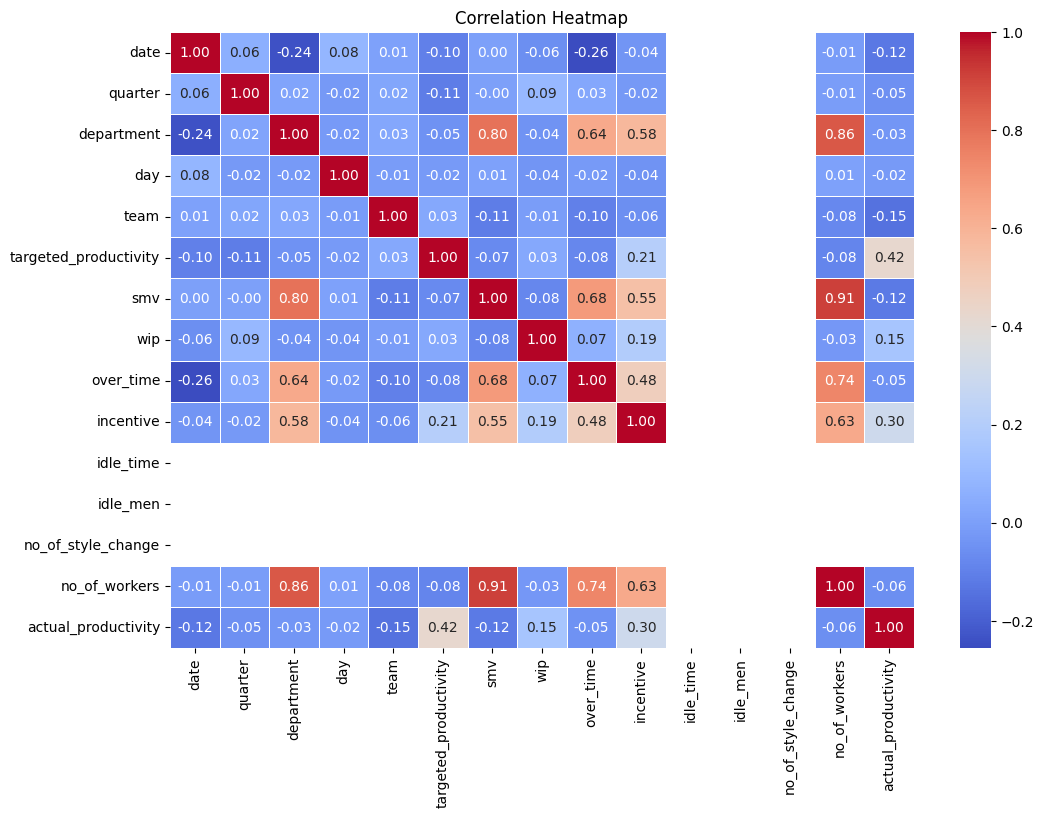

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

4. **EDA Summary:**

Exploratory Data Analysis (EDA) revealed key insights into the dataset, guiding model selection and feature importance. The following findings were derived from visualizations:

* Distribution of Target Variable (`actual_productivity`): The distribution of `actual_productivity` is slightly skewed, with most values concentrated near the higher end of the range. This suggests that workers generally meet or exceed productivity targets, with fewer cases of low productivity.

* Correlation Insights:
  * A correlation heatmap showed that targeted_productivity has a strong positive correlation with actual_productivity, indicating its predictive value.
  * Other numerical features like smv (Standard Minute Value), over_time, and incentive exhibited weaker correlations, suggesting these features may contribute non-linear relationships to productivity.

* Scatter Plot Patterns:
  * `incentive` vs. `actual_productivity`: A positive trend suggests that higher incentives improve productivity, though the relationship is not perfectly linear.
  * `over_time` vs. `actual_productivity`: High overtime does not consistently translate into higher productivity, indicating diminishing returns or worker fatigue.
  * `smv` vs. `actual_productivity`: A weak negative trend implies that tasks requiring higher time investment tend to have slightly lower productivity.

These insights emphasize the importance of features like targeted_productivity and incentive while suggesting non-linear models might perform better in capturing relationships between predictors and the target variable.

### Machine Learning Model Selection and Evaluation
1. Data Splitting:
  - Split the data into training and test sets (80% training, 20% testing).


In [ ]:
# Features and target variable
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"X_test Percentage: {(X_test.shape[0] / (X_test.shape[0] + X_train.shape[0])) * 100}%")

Training set: (957, 14), Test set: (240, 14)
X_test Percentage: 20.050125313283207%


2. Model Selection and Training:
  - Train multiple regression models to predict productivity:
    - Linear Regression: A basic regression model as a benchmark.
    - Ridge and Lasso Regression: Regularized linear models to handle multicollinearity and overfitting.
    - Random Forest Regressor: An ensemble model using decision trees for
robustness.
    - Gradient Boosting Regressor: A boosting model for iterative accuracy
improvement.
    - XGBoost Regressor: An advanced boosting algorithm with optimizations
for speed and performance.
    - Support Vector Regressor (SVR): A kernel-based model to capture
complex relationships.


In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Train models and collect results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Convert results to a DataFrame
metrics_df = pd.DataFrame(results).T
metrics_df

,MAE,MSE,R2
Linear Regression,0.547451,0.605642,0.311706
Ridge Regression,0.550629,0.603926,0.313656
Lasso Regression,0.633687,0.708101,0.195264
Random Forest,0.402419,0.405475,0.539189
Gradient Boosting,0.454254,0.473930,0.461393
XGBoost,0.430052,0.488643,0.444671
SVR,0.624851,0.725237,0.175789


3. Model Evaluation and Visualization:
  - Evaluate models using regression metrics:
    - Mean Absolute Error (MAE): Measures average absolute error.
    - Mean Squared Error (MSE): Measures squared average error.
    - R-squared (R²): Proportion of variance explained by the model.
  - Visualization of Model Performance:
    - Create a bar chart or box plot comparing the models’ MAE, MSE, and R² to
visualize their effectiveness.
    - Use residual plots to visualize how well each model captures the actual
productivity values, revealing any patterns of under- or over-estimation.

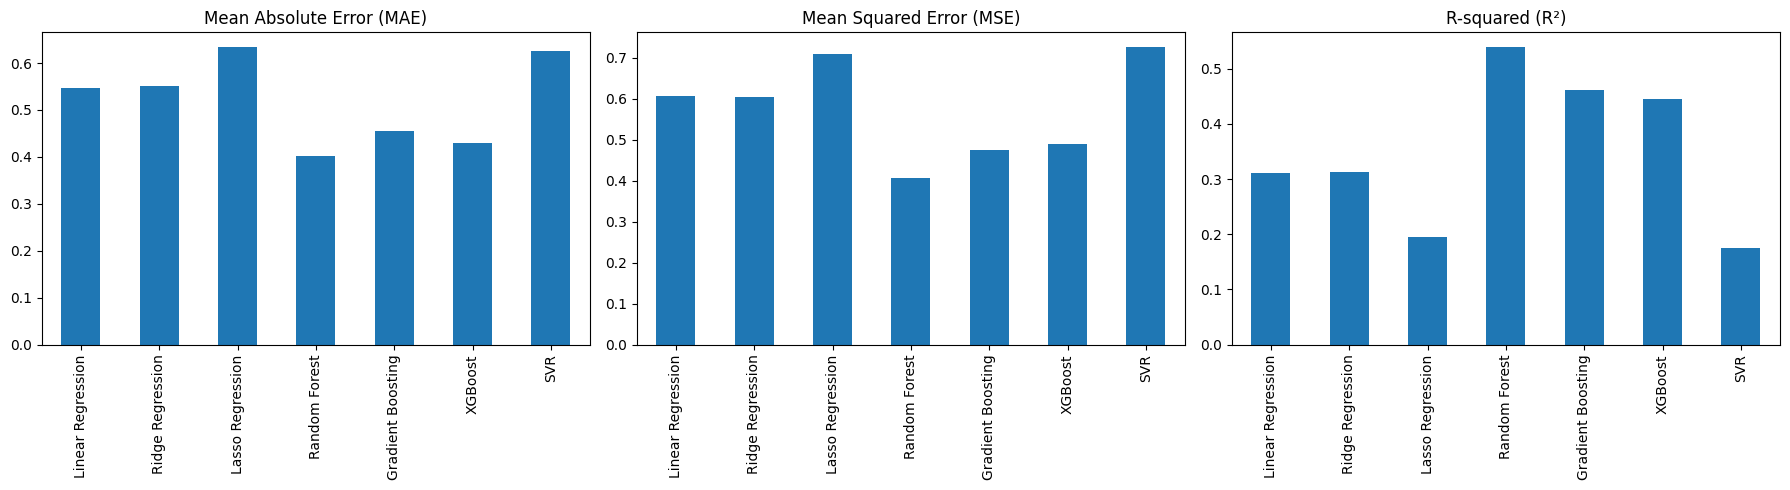

In [ ]:
# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics_df['MAE'].plot(kind='bar', ax=axes[0], title="Mean Absolute Error (MAE)")
metrics_df['MSE'].plot(kind='bar', ax=axes[1], title="Mean Squared Error (MSE)")
metrics_df['R2'].plot(kind='bar', ax=axes[2], title="R-squared (R²)")
plt.tight_layout()
plt.show()

4. **Insights from Model Comparison**



A comprehensive comparison of models using evaluation metrics highlighted the superior performance of the Random Forest model. Below are the key takeaways:

* Model Performance Metrics:
  * Random Forest achieved the lowest **Mean Absolute Error (MAE)** of **0.4024**, indicating the smallest average prediction error.
  * The **Mean Squared Error (MSE)** of **0.4055** was the lowest among all models, reflecting minimal variance in prediction errors.
  * With an **R² score** of **0.5392**, Random Forest explained approximately 54% of the variance in productivity, outperforming other models in capturing the target variable's variability.

* Comparison with Other Models:
  * Gradient Boosting and XGBoost also performed well, with R² scores of **0.4614** and **0.4447**, respectively. However, their higher error values (MAE and MSE) suggest that they may not generalize as effectively as Random Forest.
  * Linear and Ridge Regression models struggled, achieving R² scores below **0.32**, which indicates their limited ability to capture complex relationships in the data.

* **Conclusion**: The Random Forest model’s ability to effectively capture non-linear relationships and its robustness to overfitting make it the most suitable choice for this dataset. The combination of high R² and low error values underscores its reliability and accuracy for predicting productivity.

### Hyperparameter Tuning and Final Report

#### 1. Hyperparameter Tuning
  - The objective is to fine-tune the hyperparameters of the top-performing models to improve their performance

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              scoring="r2", cv=3, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best R² Score for Random Forest:", grid_search_rf.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score for Random Forest: 0.46681213988969383


In [ ]:
# Gradient Boosting
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameters to tune for Gradient Boosting
param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 10],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    scoring="r2",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model to training data
grid_search_gb.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best R² Score for Gradient Boosting (CV):", grid_search_gb.best_score_)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best R² Score for Gradient Boosting (CV): 0.47636877753178836


In [ ]:
# Evaluate the best Random Forest model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the best Gradient Boosting model
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

rf_metrics = evaluate_model(y_test, y_pred_rf)
gb_metrics = evaluate_model(y_test, y_pred_gb)

print(f"Random Forest Tuned Metrics (MAE, MSE, R²): {rf_metrics}")
print(f"Gradient Boosting Tuned Metrics (MAE, MSE, R²): {gb_metrics}")

Random Forest Tuned Metrics (MAE, MSE, R²): (0.4127409403966446, 0.40576027670901216, 0.5388654559326167)
Gradient Boosting Tuned Metrics (MAE, MSE, R²): (0.4481718148592608, 0.4552361232318715, 0.4826376208332528)


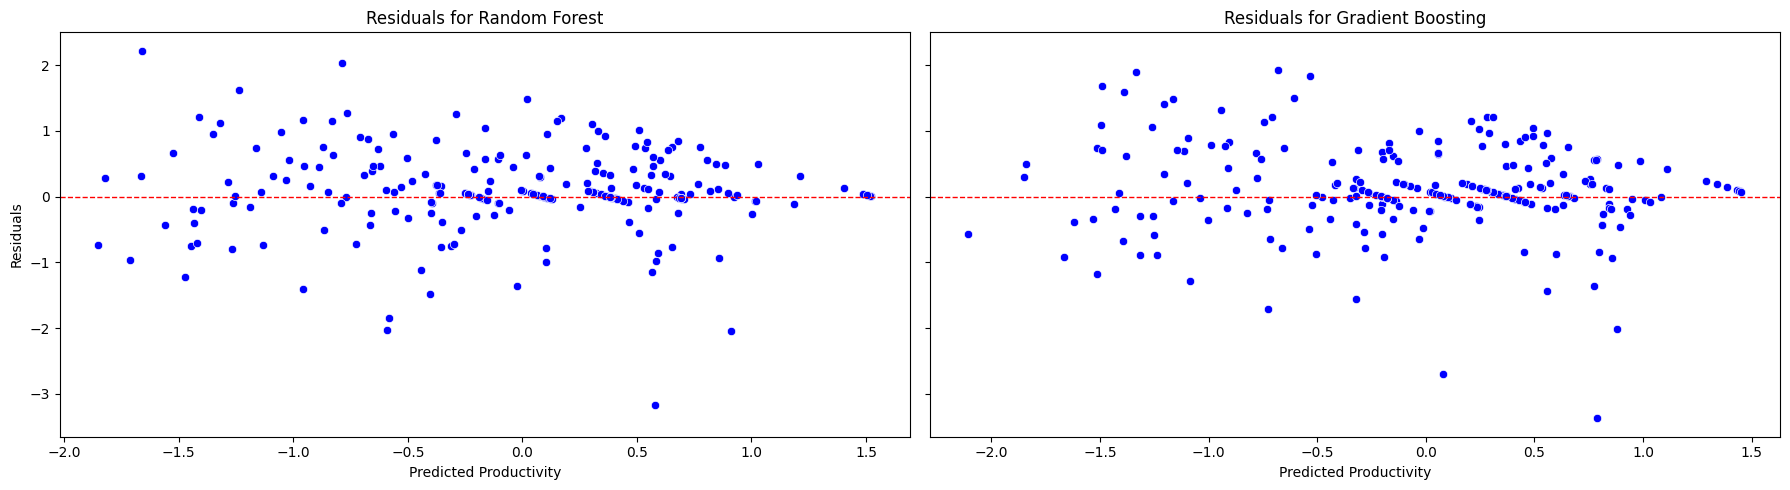

In [ ]:
y_preds = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
}

# Create residuals for each model
residuals = {model: y_test - preds for model, preds in y_preds.items()}

# Plot residuals
fig, axes = plt.subplots(1, len(residuals), figsize=(18, 5), sharey=True)

for ax, (model, res) in zip(axes, residuals.items()):
    sns.scatterplot(x=y_preds[model], y=res, ax=ax, color='blue')
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    ax.set_title(f'Residuals for {model}')
    ax.set_xlabel('Predicted Productivity')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

#### Line Chart: Before and After Tuning
- Visualizing the performance improvements for the top models.

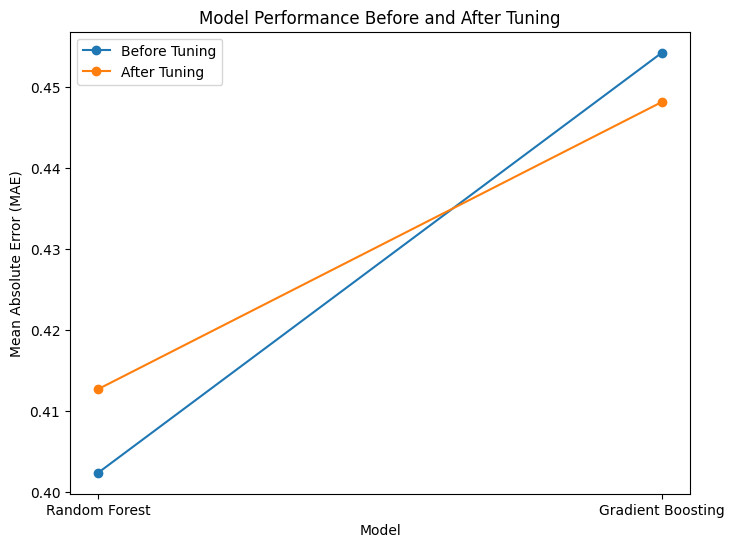

In [ ]:
models = ["Random Forest", "Gradient Boosting"]
mae_before = [results["Random Forest"]["MAE"], results["Gradient Boosting"]["MAE"]]
mae_after = [rf_metrics[0], gb_metrics[0]]

plt.figure(figsize=(8, 6))
plt.plot(models, mae_before, marker="o", label="Before Tuning")
plt.plot(models, mae_after, marker="o", label="After Tuning")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Performance Before and After Tuning")
plt.legend()
plt.show()

#### 4. Predictive System Developement
- Simple system where users can input new data to get predictions

In [ ]:
import numpy as np

# Function for prediction
def predict_productivity(input_data, model, feature_names):
    """
    Predict productivity based on input data using the specified model.

    Args:
        input_data (dict): New input data (features) as a dictionary with feature names as keys.
        model: Trained model.
        feature_names (list): List of all feature names used during training.

    Returns:
        float: Predicted productivity.
    """
    # Ensure all required features are present
    missing_features = [feature for feature in feature_names if feature not in input_data]
    if missing_features:
        raise ValueError(f"Missing features in input data: {missing_features}")

    # Arrange input data in the correct order
    input_values = [input_data[feature] for feature in feature_names]

    # Reshape the input data for prediction
    input_values = np.array(input_values).reshape(1, -1)
    prediction = model.predict(input_values)
    return prediction[0]

# Correct feature names (exclude actual_productivity)
feature_names = [
    "date", "quarter", "department", "team", "targeted_productivity", "smv",
    "wip", "over_time", "incentive", "idle_time", "idle_men",
    "no_of_style_change", "no_of_workers", "actual_productivity"
]

# New data for prediction (aligned with corrected feature names)
new_data = {
    "date": 0,
    "quarter": 1,
    "department": 0,
    "team": 3,
    "targeted_productivity": 0.8,
    "smv": 25.0,
    "wip": 50.0,
    "over_time": 100,
    "incentive": 200,
    "idle_time": 5.0,
    "idle_men": 1,
    "no_of_style_change": 2,
    "no_of_workers": 10,
    "actual_productivity": 0
}

# Predict using the trained model
predicted_productivity = predict_productivity(new_data, best_gb, feature_names)
print(f"Predicted Productivity: {predicted_productivity:.2f}")

Predicted Productivity: -1.76


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
